In [1]:
from gmres_mgs import gmres_mgs as gmres
import numpy as np
import scipy as sp
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m = 1000
A = (0.1/np.sqrt(m))*np.random.standard_normal((m,m)) + 2.0*np.eye(m)
(W,V)=la.eig(A)
lmin = np.abs(W).min()
A = A - 0.9*lmin*np.eye(m);
A = A.T.dot(A)
x = A.dot(np.ones((m,)))
b = A.dot(x)
x0 = np.random.rand(m)

In [3]:
n = 200
d = np.array([j+1. for j in range(n)])
d[1] = 1.001
d[2] = 0.95
d[3] = 0.93
import scipy.sparse as sparse
from scipy.sparse.linalg import inv
D = sparse.diags(d,0).tocsc()
beta = 0.99
X = sparse.diags([np.ones(n), beta*np.ones(n-1)], [0, 1]).tocsc()
A = X*D*inv(X)
b = A*X*np.ones(n)
x0 = np.zeros(n)
A = A.todense()

In [4]:
res = []
x = gmres(A,b,x0=x0,tol=1e-12,maxiter=50,residuals=res, restrt=8)

C:\Users\Root\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:96: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


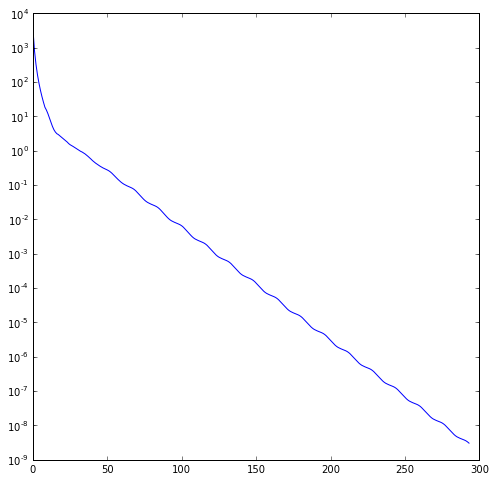

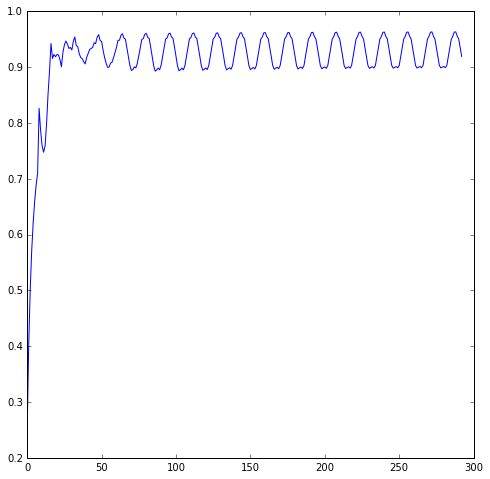

In [5]:
res = np.array(res)
plt.figure(figsize=(8,8))
plt.semilogy(res)
plt.figure(figsize=(8,8))
plt.plot(res[1:]/res[0:-1])